In [2]:
import sys
import os
# Add the src/ folder to the system path
sys.path.append('../')
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


from src.simulators.simulators import generate_customer_profiles_table,generate_terminal_profiles_table, get_list_terminals_within_radius, generate_transactions_table, generate_dataset

In [3]:
customer_profiles_table = generate_customer_profiles_table(5)
customer_profiles_table.head(5)

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [4]:
terminal_profiles_table = generate_terminal_profiles_table(10)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152
5,5,79.172504,52.889492
6,6,56.804456,92.559664
7,7,7.103606,8.712930
8,8,2.021840,83.261985
9,9,77.815675,87.001215


In [5]:
customer_profile = customer_profiles_table.iloc[1]
get_list_terminals_within_radius(customer_profile, terminal_profiles_table, 50)

[0, 1, 2, 3, 5, 6, 8, 9]

In [6]:
customer_profile 

CUSTOMER_ID            1.000000
x_customer_id         42.365480
y_customer_id         64.589411
mean_amount           46.570785
std_amount            23.285393
mean_nb_tx_per_day     3.567092
Name: 1, dtype: float64

In [7]:
# Computing the list of available terminals for each customer
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, terminal_profiles_table=terminal_profiles_table, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3, 5, 6, 9]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3, 5, 6, 8, 9]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4, 5]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3, 5, 6, 9]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3, 8]"


In [8]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2018-04-01", 
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,9,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,9,77.34,64816,0
3,2018-04-02 15:13:02,0,3,32.35,141182,1
4,2018-04-02 14:05:38,0,0,63.30,137138,1
5,2018-04-02 15:46:51,0,2,13.59,143211,1
6,2018-04-02 08:51:06,0,5,54.72,118266,1
7,2018-04-02 20:24:47,0,3,51.89,159887,1
8,2018-04-03 12:15:47,0,3,117.91,216947,2
9,2018-04-03 08:50:09,0,9,67.72,204609,2


In [9]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

/tmp/ipykernel_23766/1082527515.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)


,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,9,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,9,77.34,64816,0
3,2018-04-02 15:13:02,0,3,32.35,141182,1
4,2018-04-02 14:05:38,0,0,63.30,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,8,111.38,373279,4
61,2018-04-05 06:59:59,4,3,80.36,370799,4
62,2018-04-05 17:23:34,4,3,53.25,408214,4
63,2018-04-05 12:51:38,4,2,36.44,391898,4


In [10]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days=180, 
                     start_date="2023-01-01", 
                     r=5)

Time to generate customer profiles table: 0.024s
Time to generate terminal profiles table: 0.053s
Time to associate terminals to customers: 1.6s


/home/joshuale/Documents/GitHub/credit-card-fraud-detection/notebooks/../src/simulators/simulators.py:285: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], start_date=start_date, nb_days=nb_days)).reset_index(drop=True)


Time to generate transactions: 3.6e+01s


In [11]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2023-01-01 00:00:31,596,3156,57.16,31,0
1,1,2023-01-01 00:02:10,4961,3412,81.51,130,0
2,2,2023-01-01 00:07:56,2,1365,146.00,476,0
3,3,2023-01-01 00:09:29,4128,8737,64.49,569,0
4,4,2023-01-01 00:10:34,927,9906,50.99,634,0
...,...,...,...,...,...,...,...
1725487,1725487,2023-06-29 23:57:12,3700,9646,52.82,15551832,179
1725488,1725488,2023-06-29 23:57:40,2760,6456,2.16,15551860,179
1725489,1725489,2023-06-29 23:57:54,1894,2766,24.75,15551874,179
1725490,1725490,2023-06-29 23:58:59,4626,4238,60.97,15551939,179


/tmp/ipykernel_23766/699922564.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
/tmp/ipykernel_23766/699922564.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = Fa

[Text(0.5, 0, 'Time (days)'), Text(0, 0.5, 'Number of transactions')]

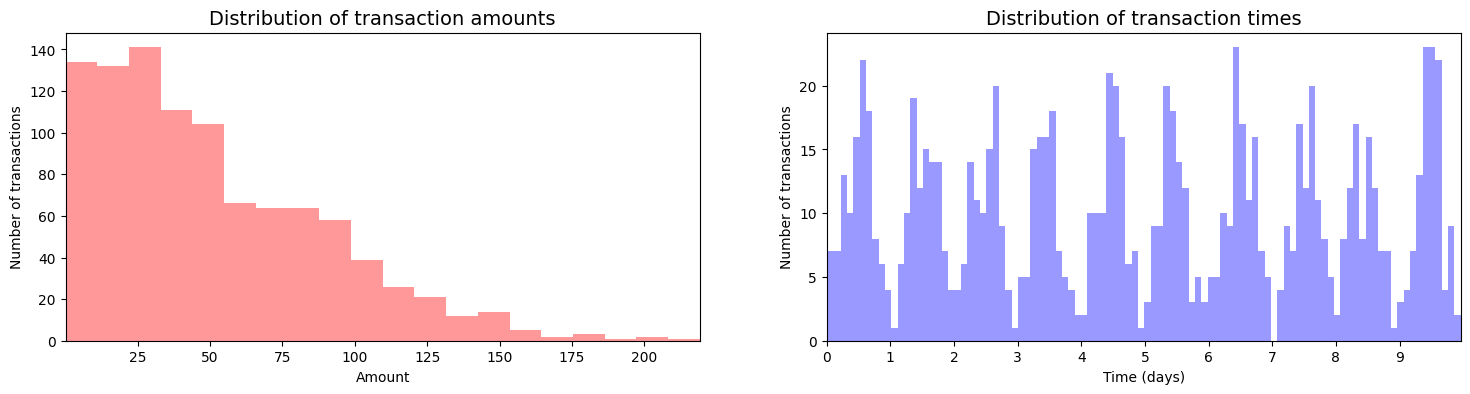

In [12]:
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=1000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=1000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")